this whole investigation is pointless in some sense. 

mostly the it is the diagonal entries of that has the largest values

In [2]:
import numpy as np
import scipy as sp
from scipy import fft

from  matplotlib import pyplot as plt

from tqdm import tqdm

In [3]:
next_pow_2 = lambda n: 2**(int(np.log2(n))+2)

In [4]:
def acf2(X,Y):
    assert(len(X) == len(Y))
    n = len(X)
    N = next_pow_2(n)
    fx = fft.fft(X,N)
    fy = fft.fft(Y,N)
    acov = fft.ifft(fx * np.conjugate(fy))[:n].real
    return acov/(np.correlate(X,Y))

In [5]:
def acf_mat(samples):
    _,n = samples.shape
    
    ret = np.array([[ acf2(samples[:,i],samples[:,j]) for j in range(n)] for i in tqdm( range(n))])
    return ret.T

In [6]:
n = 10000000
X = np.random.normal(size=n)
Y = np.random.normal(size=n,scale=5)
X,Y = (X+Y,X-Y)

Z = np.random.uniform(-10,10,size=n) + X + Y
samples = np.array([X,Y,Z]).T

In [7]:
acov_mat = acf_mat(samples)

100%|██████████| 3/3 [00:29<00:00,  9.69s/it]


In [8]:
acov_mat.shape

(10000000, 3, 3)

In [9]:
max_entries = [np.max(np.abs(i.flatten())) for i in acov_mat]

In [10]:
argmax_entries = [np.argmax(np.abs(i.flatten())) for i in acov_mat]

In [11]:
from collections import Counter

c = Counter(argmax_entries)

In [12]:
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [13]:
c

Counter({2: 2460923,
         5: 2539405,
         7: 2535252,
         6: 2461201,
         1: 976,
         3: 968,
         8: 738,
         0: 257,
         4: 280})

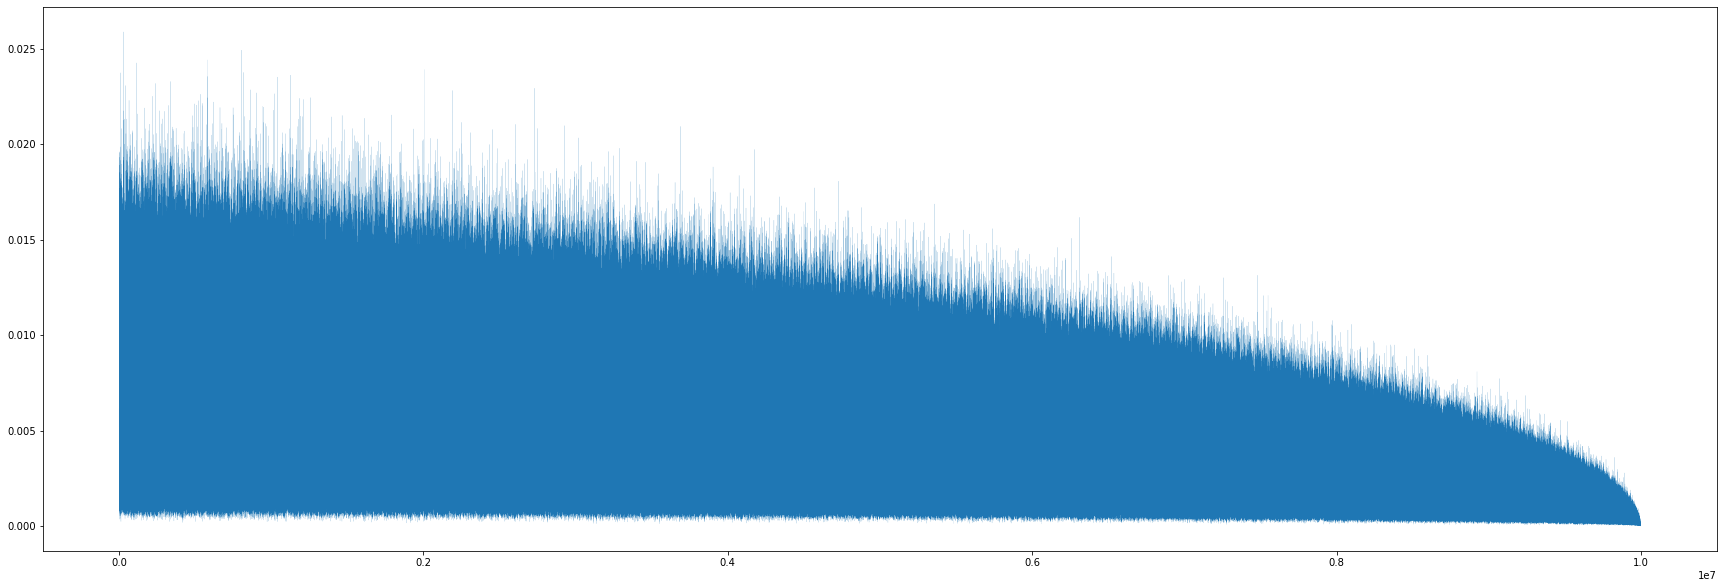

In [14]:
plt.figure(figsize=(30,10))
plt.plot(max_entries[100:],linewidth=.1)

4.748235658364835e-07

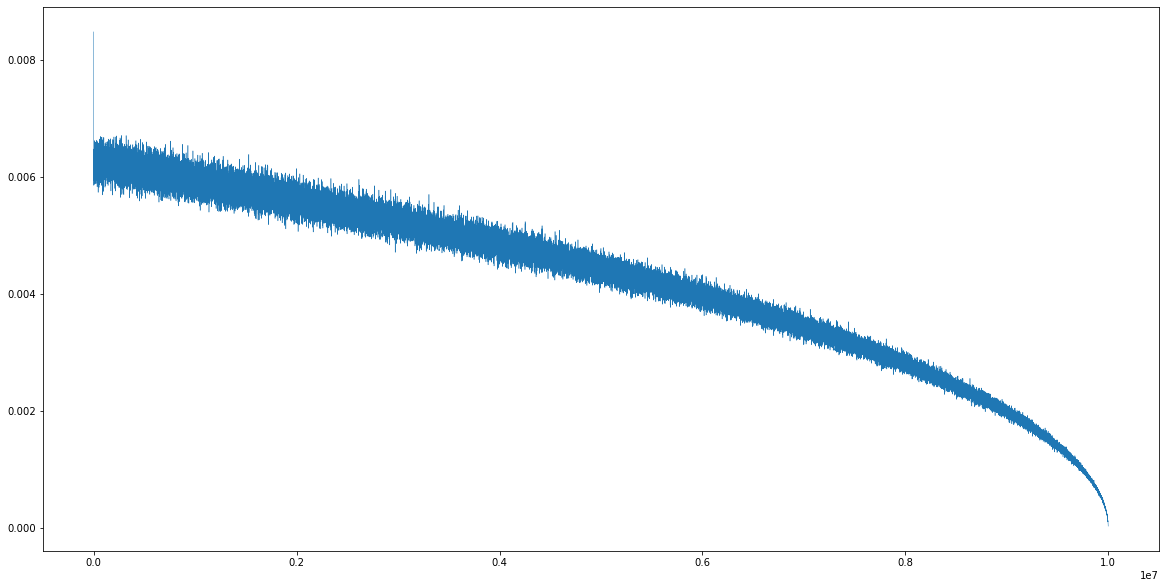

In [15]:
box = np.ones(400)/400
plt.figure(figsize=(20,10))
plt.plot(np.convolve(max_entries,box,mode='valid'),linewidth=.5)
max_entries[-1]

this convergence is likely to be false: the fft version of the algorithm is fake. unless it shows convergence half-way, I won't believe it. 